In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [3]:
img = image.load_img(r"C:\Users\shali\Desktop\DS_Road_Map\12. Deep Learning\CNN\MOOD CLASSIFICATION\trainning\happy\6.jpeg")

In [4]:
i1 = cv2.imread(r"C:\Users\shali\Desktop\DS_Road_Map\12. Deep Learning\CNN\MOOD CLASSIFICATION\trainning\happy\6.jpeg")
i1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [248, 248, 248],
        [240, 240, 240]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 250, 250],
        [249, 249, 249],
        [248, 248, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [245, 245, 245],
        [250, 250, 250],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 10,  10,  10],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  4,   4,   4],
        [  6,   6,   6],
        ...,
        [  4,   4,   4],
        [  0,   0,   0],
        [  9,   9,   9]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [5]:
i1.shape

(233, 216, 3)

In [6]:
train = ImageDataGenerator(rescale= 2/200)
validation = ImageDataGenerator(rescale=1/200)

In [7]:
train_dataset = train.flow_from_directory(r"C:\Users\shali\Desktop\DS_Road_Map\12. Deep Learning\CNN\MOOD CLASSIFICATION\trainning",
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode ='binary')

validation_dataset = validation.flow_from_directory(r"C:\Users\shali\Desktop\DS_Road_Map\12. Deep Learning\CNN\MOOD CLASSIFICATION\validation",
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode ='binary')


Found 25 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation="relu",input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3), activation="relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    
                                    tf.keras.layers.Dense(1,activation="sigmoid")])


C:\Users\shali\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = ["accuracy"])

In [12]:
model_fit = model.fit(train_dataset,epochs=15)

C:\Users\shali\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


C:\Users\shali\AppData\Roaming\Python\Python313\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5200 - loss: 0.6759
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.5200 - loss: 27.3913
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.4800 - loss: 13.7140
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.4800 - loss: 1.1539
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.5200 - loss: 0.8353
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.4800 - loss: 1.0400
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.5600 - loss: 0.6151
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.9600 - loss: 0.5758
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.6000 - loss: 0.5314
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.5200 - loss: 0.5856
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.5600 - loss: 0.7289
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9600 - loss: 0.4852
E

In [13]:
dir_path = (r"C:\Users\shali\Desktop\DS_Road_Map\12. Deep Learning\CNN\MOOD CLASSIFICATION\testing")
for i in os.listdir(dir_path):
    print(i)

happy
not happy


In [14]:
dir_path = r"C:\Users\shali\Desktop\DS_Road_Map\12. Deep Learning\CNN\MOOD CLASSIFICATION\testing"
# ✅ Loop through only image files
for i in os.listdir(dir_path):
    if i.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.jfif')):
        img_path = os.path.join(dir_path, i)  # ✅ safe way to join path
        print(f"Processing: {img_path}")
        img = image.load_img(img_path, target_size=(200, 200))
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    else:
        print(f"Skipping non-image file: {i}")

Skipping non-image file: happy
Skipping non-image file: not happy


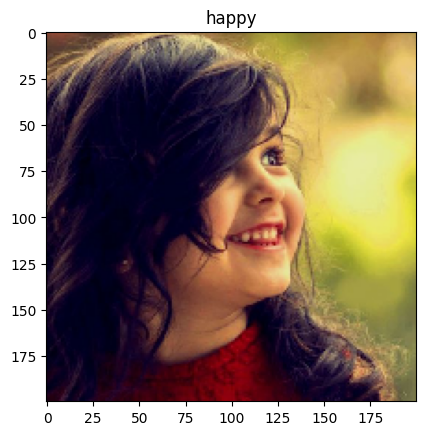

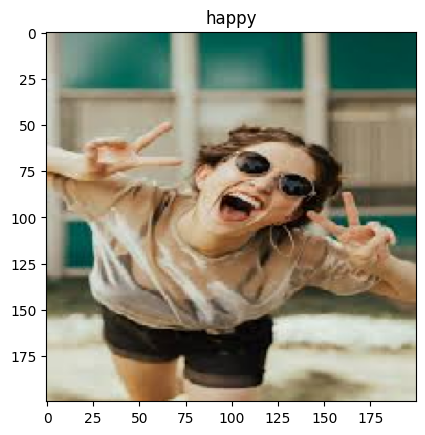

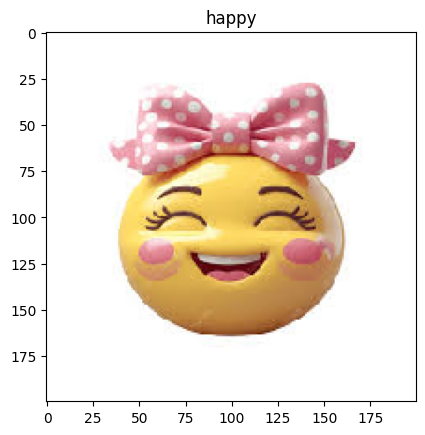

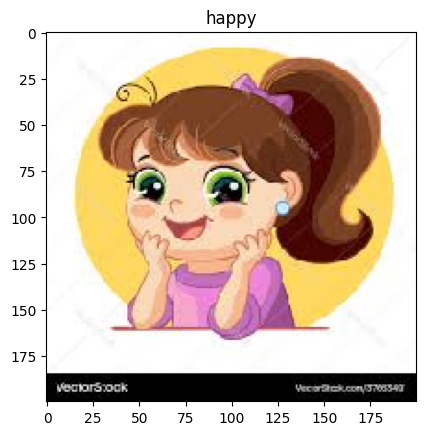

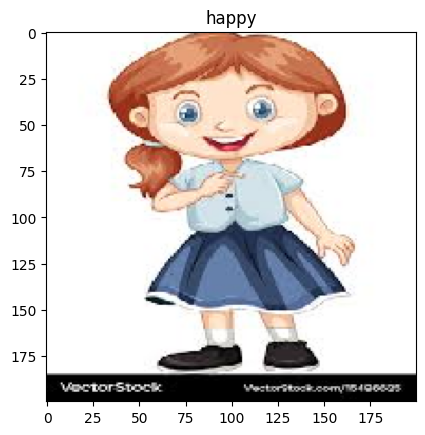

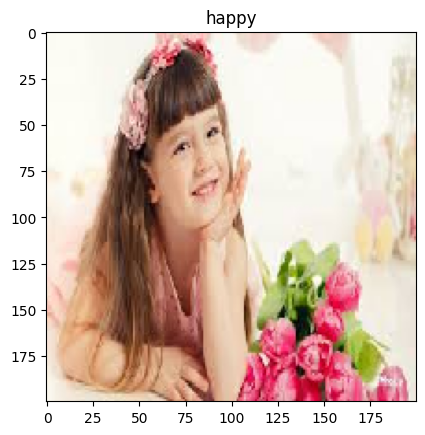

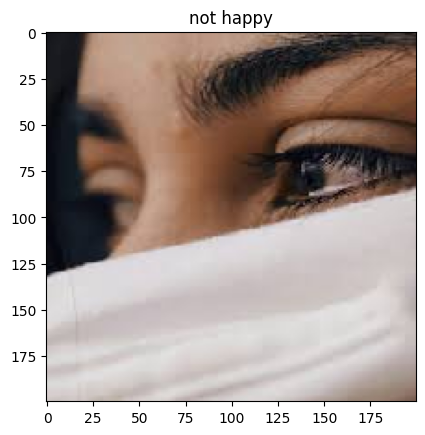

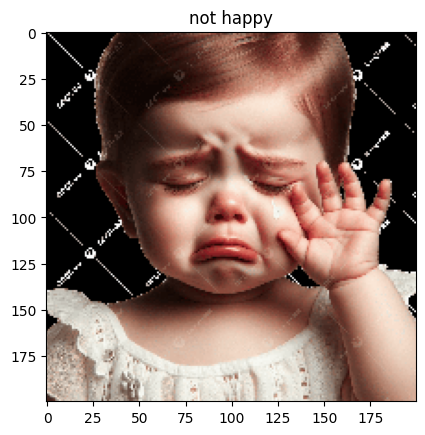

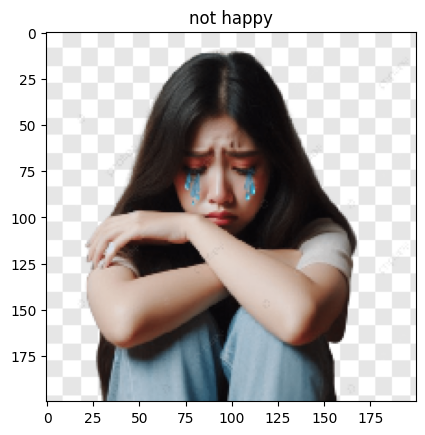

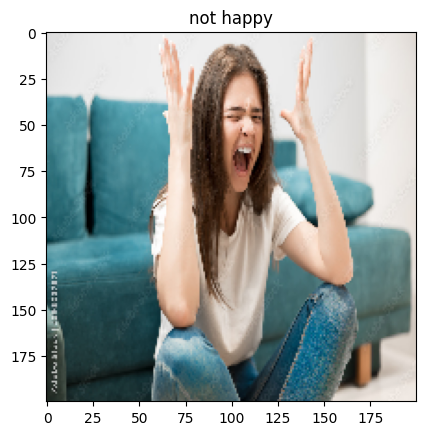

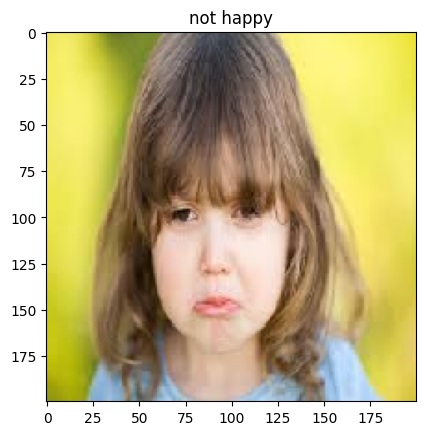

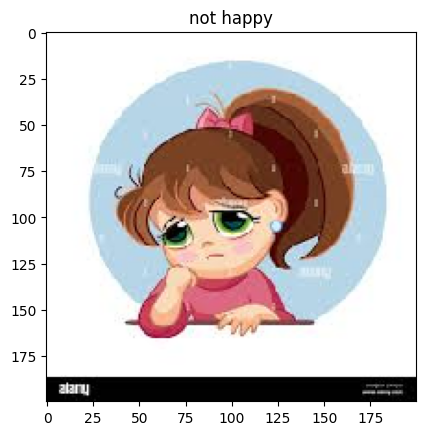

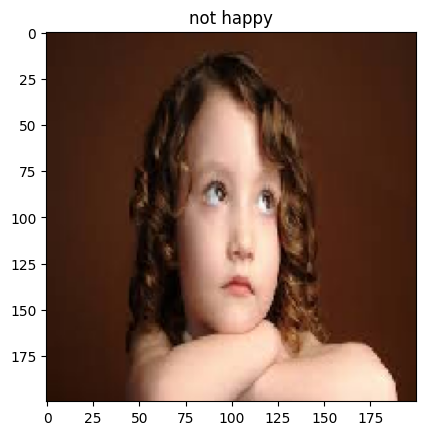

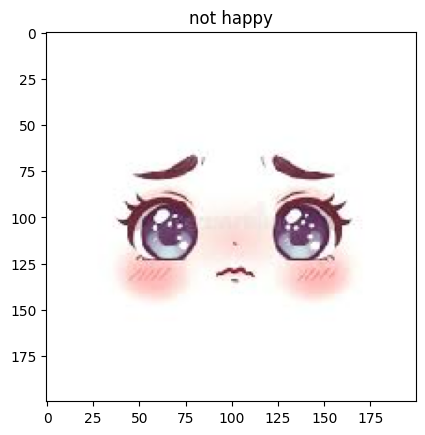

In [15]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = "C:/Users/shali/Desktop/DS_Road_Map/12. Deep Learning/CNN/MOOD CLASSIFICATION/testing"

# Loop through subfolders (e.g., happy, sad)
for folder in os.listdir(dir_path):
    subfolder_path = os.path.join(dir_path, folder)

    # Only process if it's actually a folder
    if os.path.isdir(subfolder_path):
        for img_file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, img_file)

            # Only load valid image files
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img = image.load_img(file_path, target_size=(200, 200))
                plt.imshow(img)
                plt.title(folder)  # show folder name as title
                plt.show()


In [16]:
# ✅ Fix path
dir_path = r"C:\Users\shali\Desktop\DS_Road_Map\12. Deep Learning\CNN\MOOD CLASSIFICATION\testing"
for i in os.listdir(dir_path):
    if i.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # ✅ Only image files
        img_path = os.path.join(dir_path, i)
        img = image.load_img(img_path, target_size=(200, 200))
        plt.imshow(img)
        plt.show()

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        val = model.predict(images)
        if val[0][0] > 0.5:
            print("I am Happy 😊")
        else:
            print("I am not Happy 😞")